In [1]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import librosa.display
import IPython.display as ipd

## Reading Dataset

In [3]:
import pandas as pd
df1=pd.read_excel('Healthy_data.xlsx')
df2=pd.read_excel('Pathological_data.xlsx')
df=pd.concat([df1,df2], ignore_index=True)
df=df[df.Gender=='m']
df.head(10)

,Recording Id,Type,Gender,Age,Diagnosis Notes,Pathology,Audio
3,4,n,m,22,Normal,Normal,4-a_n.wav
4,5,n,m,22,Normal,Normal,5-a_n.wav
10,9,n,m,25,Normal,Normal,9-a_n.wav
13,11,n,m,23,Normal,Normal,11-a_n.wav
17,15,n,m,24,Normal,Normal,15-a_n.wav
29,29,n,m,58,Normal,Normal,29-a_n.wav
32,32,n,m,45,Normal,Normal,32-a_n.wav
41,40,n,m,20,Normal,Normal,40-a_n.wav
42,41,n,m,20,Normal,Normal,41-a_n.wav
44,43,n,m,32,Normal,Normal,43-a_n.wav


In [4]:
df.shape

(561, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 3 to 1358
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Recording Id     561 non-null    int64 
 1   Type             561 non-null    object
 2   Gender           561 non-null    object
 3   Age              561 non-null    int64 
 4   Diagnosis Notes  534 non-null    object
 5   Pathology        561 non-null    object
 6   Audio            561 non-null    object
dtypes: int64(2), object(5)
memory usage: 35.1+ KB


In [6]:
type_gender_count = df.groupby(["Type","Gender"])[['Audio']].count()
type_gender_count

,,Audio
Type,Gender,
n,m,259
p,m,302


<Axes: xlabel='Type,Gender'>

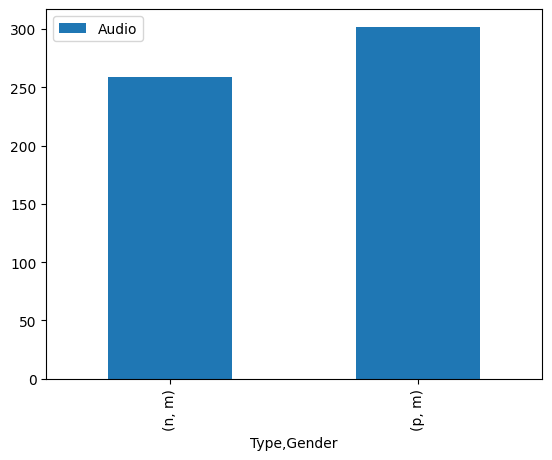

In [7]:
type_gender_count.plot.bar()

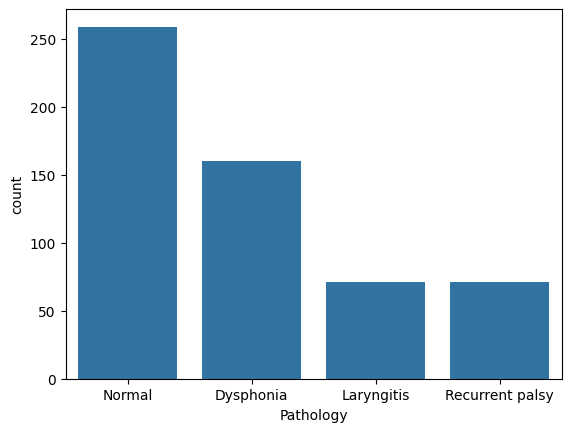

In [8]:
sns.countplot(x=df["Pathology"])
plt.show()

## Extract Features

In [10]:
## Extracting MFCC's for every audio file
import pandas as pd
import os

audio_dataset_path = 'Filtered_Audio_Dataset/'

In [11]:
def features_extraction(file):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr= sample_rate, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [12]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = audio_dataset_path+row["Audio"]
    final_class_labels = row["Pathology"]
    data = features_extraction(file_name)
    extracted_features.append([data,final_class_labels])

561it [00:10, 52.29it/s]


In [13]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-279.40063, 208.5046, -43.03498, -5.360972, -...",Normal
1,"[-172.24774, 175.08725, -75.93269, 8.99103, -6...",Normal
2,"[-160.34767, 238.37305, -50.651237, -8.1686945...",Normal
3,"[-174.26558, 202.43498, -48.88869, 26.138357, ...",Normal
4,"[-178.27687, 191.5492, -72.10441, 7.839301, -4...",Normal
5,"[-197.26646, 189.61101, -47.13572, 9.000772, -...",Normal
6,"[-228.07176, 183.02597, -31.626911, -15.123821...",Normal
7,"[-235.79805, 207.87103, -39.370472, -27.216578...",Normal
8,"[-332.56256, 205.95406, -61.05219, 7.6796494, ...",Normal
9,"[-147.25772, 178.20045, -82.12582, 1.9781523, ...",Normal


In [14]:
extracted_features_df.shape

(561, 2)

In [15]:
extracted_features_df["feature"][0]

array([-2.7940063e+02,  2.0850459e+02, -4.3034981e+01, -5.3609719e+00,
       -5.2530403e+01, -8.8619261e+00, -7.6732415e-01,  6.7943349e+00,
        1.0799702e+01, -1.3331823e+00,  8.6732759e+00, -7.2678752e+00,
        1.8010962e+01,  1.9159014e+01, -2.7179031e+01, -1.2447955e+01,
        1.8915423e+00, -1.5298142e+01, -4.0988545e+00,  1.8953447e+00,
        4.7810760e+00, -3.4840662e+00, -1.6979162e+01, -3.4267972e+00,
        4.2249260e+00, -9.3542862e+00, -7.8552189e+00, -2.2184309e-01,
       -7.5720377e+00, -6.0218911e+00, -9.1817122e+00,  6.1179090e+00,
        4.7846541e+00, -8.6046515e+00,  1.2105453e+01, -1.6410214e+00,
       -9.7464371e+00,  3.2591763e+00, -8.6933661e+00, -5.1998725e+00,
        3.8980737e+00, -7.4412656e+00, -5.7363014e+00, -3.9971590e+00,
       -6.7316098e+00, -3.1640453e+00, -6.6905761e+00, -3.9208169e+00,
       -3.4986355e+00, -3.5767493e+00, -3.5865269e+00, -6.1424880e+00,
       -8.7377186e+00, -6.3181624e+00, -2.7753470e+00, -4.7034574e+00,
      

In [16]:
## Label Encoding
dummy_data = pd.get_dummies(extracted_features_df['class'])

In [17]:
dummy_data

,Dysphonia,Laryngitis,Normal,Recurrent palsy
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
556,False,False,False,True
557,False,False,False,True
558,False,False,False,True
559,False,False,False,True


In [18]:
x=np.array(extracted_features_df['feature'].values.tolist())
y=dummy_data

In [19]:
x.shape

(561, 80)

In [20]:
y.shape

(561, 4)

In [21]:
### Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify= y, test_size=0.2,random_state=0)

In [22]:
x_train.shape

(448, 80)

In [23]:
x_test.shape

(113, 80)

In [24]:
y_train.shape

(448, 4)

In [25]:
y_test.shape

(113, 4)

## Model Training

In [26]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [28]:
## No. of classes
num_labels=y.shape[1]
num_labels

4

In [29]:
model=Sequential()
## first layer
model.add(Dense(256,input_shape=(80,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## third layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               20736     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               1

In [32]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=150
num_batch_size=32

checkpointer=ModelCheckpoint(filepath='/audio_classification.hdf5', verbose=1, save_best_only=True)
start=datetime.now()

model.fit(x_train,y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test,y_test), callbacks=[checkpointer])
duration=datetime.now()-start

print("Training completed in time: ",duration)

Epoch 1/150
13/14 [==========================>...] - ETA: 0s - loss: 20.0869 - accuracy: 0.2933 
Epoch 1: val_loss improved from inf to 5.09273, saving model to /audio_classification.hdf5
14/14 [==============================] - 2s 67ms/step - loss: 19.7239 - accuracy: 0.2969 - val_loss: 5.0927 - val_accuracy: 0.4336
Epoch 2/150
11/14 [======================>.......] - ETA: 0s - loss: 13.0326 - accuracy: 0.3665
Epoch 2: val_loss improved from 5.09273 to 1.79745, saving model to /audio_classification.hdf5


C:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 0s 35ms/step - loss: 12.4268 - accuracy: 0.3616 - val_loss: 1.7975 - val_accuracy: 0.4425
Epoch 3/150
14/14 [==============================] - ETA: 0s - loss: 9.9930 - accuracy: 0.3259
Epoch 3: val_loss did not improve from 1.79745
14/14 [==============================] - 0s 7ms/step - loss: 9.9930 - accuracy: 0.3259 - val_loss: 2.1115 - val_accuracy: 0.4602
Epoch 4/150
13/14 [==========================>...] - ETA: 0s - loss: 6.6889 - accuracy: 0.3438
Epoch 4: val_loss improved from 1.79745 to 1.69407, saving model to /audio_classification.hdf5
14/14 [==============================] - 0s 11ms/step - loss: 6.8001 - accuracy: 0.3438 - val_loss: 1.6941 - val_accuracy: 0.4425
Epoch 5/150
11/14 [======================>.......] - ETA: 0s - loss: 5.0778 - accuracy: 0.3381
Epoch 5: val_loss improved from 1.69407 to 1.38886, saving model to /audio_classification.hdf5
14/14 [==============================] - 0s 12ms/step - loss: 4.7961 - accuracy: 0.3527 

Epoch 32/150
12/14 [========================>.....] - ETA: 0s - loss: 1.2908 - accuracy: 0.4505
Epoch 32: val_loss did not improve from 1.27128
14/14 [==============================] - 0s 9ms/step - loss: 1.3063 - accuracy: 0.4487 - val_loss: 1.3322 - val_accuracy: 0.4425
Epoch 33/150
12/14 [========================>.....] - ETA: 0s - loss: 1.3468 - accuracy: 0.3880
Epoch 33: val_loss did not improve from 1.27128
14/14 [==============================] - 0s 10ms/step - loss: 1.3236 - accuracy: 0.4152 - val_loss: 1.3210 - val_accuracy: 0.4602
Epoch 34/150
13/14 [==========================>...] - ETA: 0s - loss: 1.2565 - accuracy: 0.4471
Epoch 34: val_loss did not improve from 1.27128
14/14 [==============================] - 0s 8ms/step - loss: 1.2706 - accuracy: 0.4375 - val_loss: 1.3176 - val_accuracy: 0.4867
Epoch 35/150
13/14 [==========================>...] - ETA: 0s - loss: 1.2890 - accuracy: 0.4423
Epoch 35: val_loss did not improve from 1.27128
14/14 [=============================

14/14 [==============================] - 0s 12ms/step - loss: 1.1732 - accuracy: 0.4955 - val_loss: 1.2222 - val_accuracy: 0.4513
Epoch 61/150
13/14 [==========================>...] - ETA: 0s - loss: 1.1754 - accuracy: 0.5192
Epoch 61: val_loss did not improve from 1.18552
14/14 [==============================] - 0s 7ms/step - loss: 1.1686 - accuracy: 0.5201 - val_loss: 1.2128 - val_accuracy: 0.4956
Epoch 62/150
13/14 [==========================>...] - ETA: 0s - loss: 1.1341 - accuracy: 0.4808
Epoch 62: val_loss did not improve from 1.18552
14/14 [==============================] - 0s 8ms/step - loss: 1.1591 - accuracy: 0.4710 - val_loss: 1.1973 - val_accuracy: 0.4956
Epoch 63/150
14/14 [==============================] - ETA: 0s - loss: 1.1627 - accuracy: 0.5156
Epoch 63: val_loss did not improve from 1.18552
14/14 [==============================] - 0s 8ms/step - loss: 1.1627 - accuracy: 0.5156 - val_loss: 1.2002 - val_accuracy: 0.4867
Epoch 64/150
11/14 [======================>.......]

14/14 [==============================] - 0s 8ms/step - loss: 0.7266 - accuracy: 0.7098 - val_loss: 1.1553 - val_accuracy: 0.5664
Epoch 119/150
13/14 [==========================>...] - ETA: 0s - loss: 0.7202 - accuracy: 0.6899
Epoch 119: val_loss did not improve from 1.06939
14/14 [==============================] - 0s 9ms/step - loss: 0.7103 - accuracy: 0.6942 - val_loss: 1.1720 - val_accuracy: 0.5487
Epoch 120/150
12/14 [========================>.....] - ETA: 0s - loss: 0.7201 - accuracy: 0.6667
Epoch 120: val_loss did not improve from 1.06939
14/14 [==============================] - 0s 9ms/step - loss: 0.7383 - accuracy: 0.6562 - val_loss: 1.2020 - val_accuracy: 0.5487
Epoch 121/150
10/14 [====================>.........] - ETA: 0s - loss: 0.6719 - accuracy: 0.7219
Epoch 121: val_loss did not improve from 1.06939
14/14 [==============================] - 0s 11ms/step - loss: 0.6883 - accuracy: 0.7210 - val_loss: 1.1548 - val_accuracy: 0.5664
Epoch 122/150
 9/14 [==================>.....

In [33]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.5663716793060303


In [34]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 5ms/step


In [35]:
y_pred

array([[5.21335721e-01, 6.03344887e-02, 3.78312707e-01, 4.00171168e-02],
       [4.38383162e-01, 7.76297227e-02, 4.10677373e-01, 7.33098313e-02],
       [4.79756109e-03, 3.38966562e-03, 9.83638763e-01, 8.17399565e-03],
       [9.88633454e-01, 4.65298508e-04, 4.73802822e-04, 1.04274806e-02],
       [3.66762398e-10, 1.67155392e-08, 1.00000000e+00, 1.74657213e-08],
       [2.88848337e-02, 1.48647465e-03, 9.64680314e-01, 4.94836131e-03],
       [9.99979019e-01, 4.51676300e-07, 1.26792220e-05, 7.87444151e-06],
       [5.36922598e-03, 6.35337308e-02, 8.70429158e-01, 6.06677979e-02],
       [9.98053193e-01, 6.88087748e-05, 1.57658372e-03, 3.01391672e-04],
       [3.98994714e-01, 1.95482150e-01, 1.92756817e-01, 2.12766305e-01],
       [3.78517121e-01, 4.16290283e-01, 4.88174334e-03, 2.00310856e-01],
       [4.76295408e-03, 4.52310815e-05, 9.94987607e-01, 2.04267242e-04],
       [6.58991194e-05, 2.01910012e-03, 9.97558355e-01, 3.56639561e-04],
       [6.39223913e-03, 7.97156394e-02, 7.75253296e

In [36]:
y_test.values

array([[ True, False, False, False],
       [False, False,  True, False],
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [ True, False, False, False],
       [False, False,  True, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       [ True, False, False, False],
       [False, False,  True, False],
       [ True, False, False, False],
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False, False,  True],
       [ True, False, False, False],
       [False, False, False,  True],
       [False, False,  True, False],
       [False, False, False,  True],
       [False, False,  True, False],
       [ True, False, False, False],
 

4/4 [==============================] - 0s 7ms/step


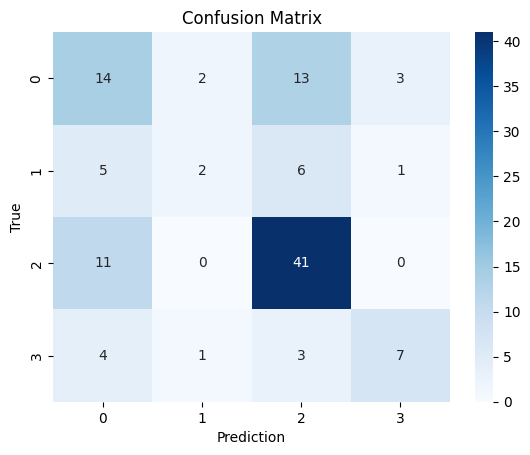

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

#Plot confusion matrix
sns.heatmap( conf_matrix, annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Model Evaluation

In [37]:
filename = 'Male_Female_Healthy_Dataset/1004-a_n.wav'

In [38]:
feature_df = pd.DataFrame(features_extraction(filename)).transpose()

In [39]:
feature_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-149.225266,174.276077,-18.307064,10.403212,-66.140961,-11.231764,-8.218404,-4.863341,-25.08256,-1.205913,...,0.736559,-0.999705,-1.608087,-2.276558,0.696951,-0.647705,0.926778,-2.020046,-1.749156,-0.680004


In [40]:
features = np.array(feature_df.values.tolist())

In [41]:
features.shape

(1, 80)

In [42]:
model.predict(features)

1/1 [==============================] - 0s 23ms/step


array([[0.0403503 , 0.05112532, 0.00324971, 0.9052746 ]], dtype=float32)